In [23]:
!gdown 1ujSYC3tEC3VNoxqUIWO2PG7Lg5HAdYqn
!tar -xf models.zip

^C


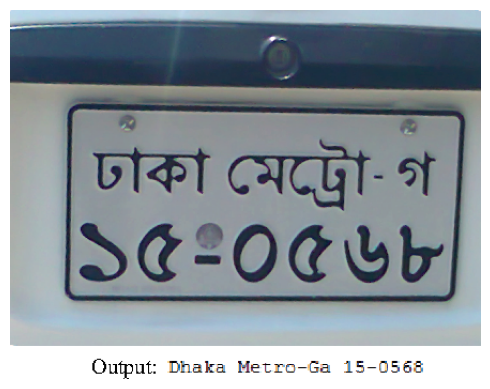

In [1]:
import utils
utils.show_image('images/image1.jpg')

Image Name: images/image1.jpg
License Plate Text: ('ঢাকা মেট্রো-গ', '১৫-০৫৬৮')


('ঢাকা মেট্রো-গ', '১৫-০৫৬৮')

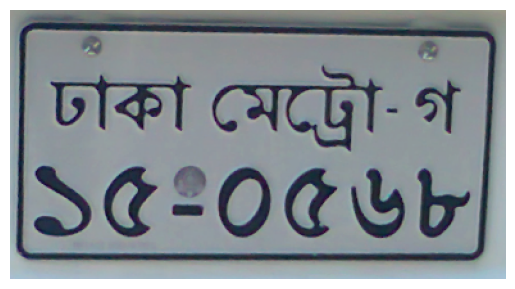

In [2]:
utils.detect_and_extract_lp_text('images/image1.jpg')

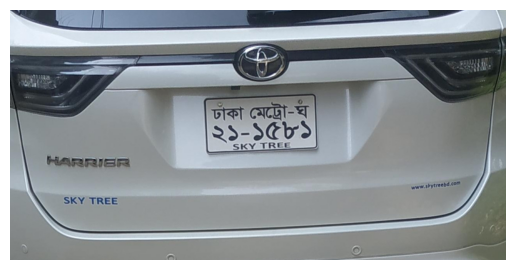

In [3]:
utils.show_image('images/image2.jpg')

Image Name: images/image2.jpg
License Plate Text: ('ঢাকা মেট্রো-হ', '২১১৫৮১৫')


('ঢাকা মেট্রো-হ', '২১১৫৮১৫')

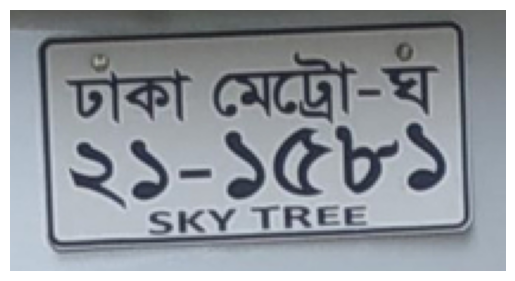

In [4]:
utils.detect_and_extract_lp_text('images/image2.jpg')

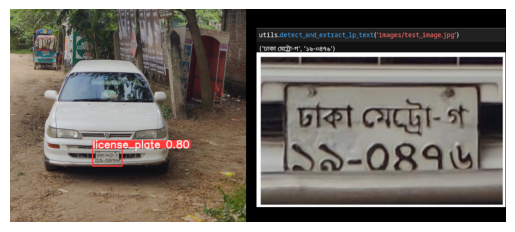

In [5]:
utils.show_image('images/image3.jpg')

Image Name: images/image3.jpg
License Plate Text: ('ঢাকা মেট্রো-গ', '১৯-০৪৭৬')


('ঢাকা মেট্রো-গ', '১৯-০৪৭৬')

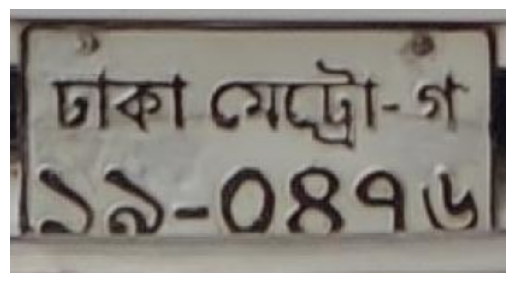

In [6]:
utils.detect_and_extract_lp_text('images/image3.jpg')

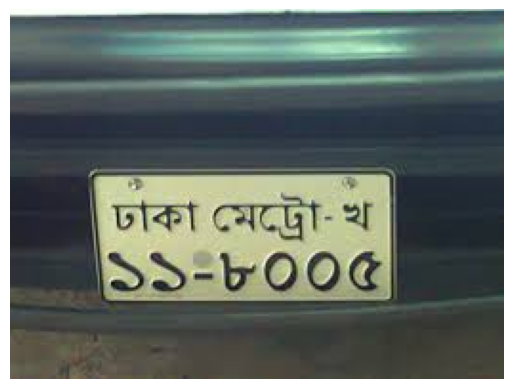

In [7]:
utils.show_image('images/image4.jpg')

Image Name: images/image4.jpg
License Plate Text: ('ঢাকা মেট্রো-খ', '১১-৮০০')


('ঢাকা মেট্রো-খ', '১১-৮০০')

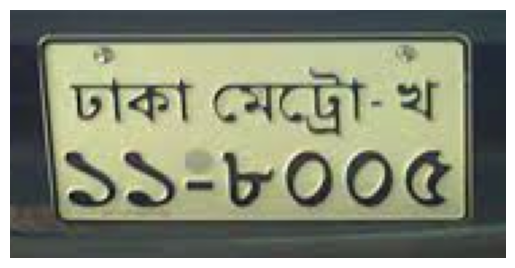

In [8]:
utils.detect_and_extract_lp_text('images/image4.jpg')

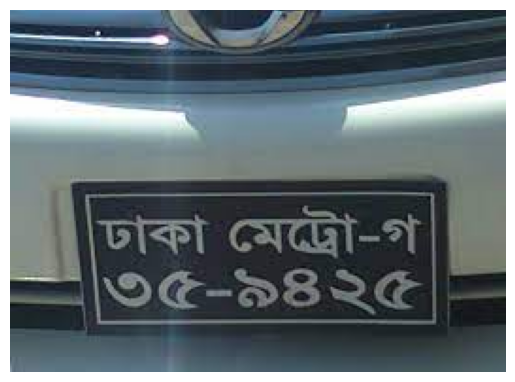

In [9]:
utils.show_image('images/image5.jpg')

Image Name: images/image5.jpg
License Plate Text: ('ঢাকা মেট্রো-গ', '-৯৪২৫')


('ঢাকা মেট্রো-গ', '-৯৪২৫')

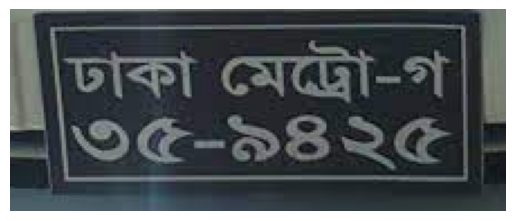

In [10]:
utils.detect_and_extract_lp_text('images/image5.jpg')

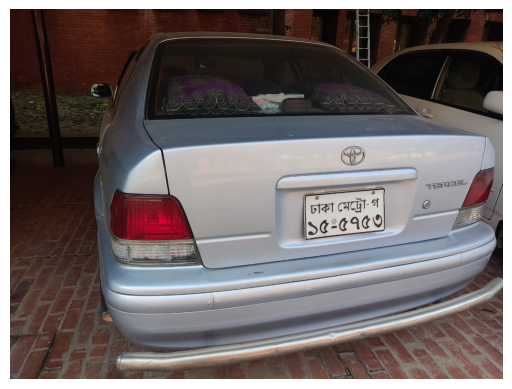

In [11]:
utils.show_image('images/image6.jpg')

Image Name: images/image6.jpg
License Plate Text: ('ঢাকা মেট্রো-গ', '১৫-৫৭৫৩')


('ঢাকা মেট্রো-গ', '১৫-৫৭৫৩')

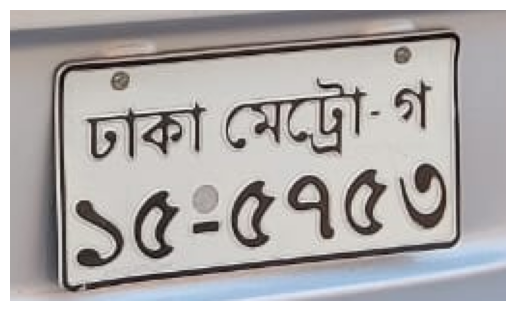

In [12]:
utils.detect_and_extract_lp_text('images/image6.jpg')

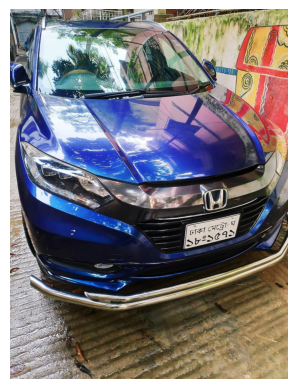

In [13]:
utils.show_image('images/image7.jpg')

Image Name: images/image7.jpg
License Plate Text: ('রাজ মেট্রো-ঢ', '১৮-১৫৭১')


('রাজ মেট্রো-ঢ', '১৮-১৫৭১')

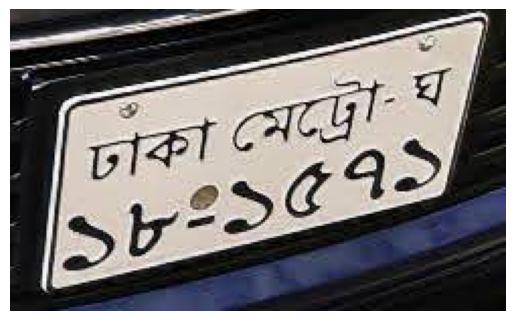

In [14]:
utils.detect_and_extract_lp_text('images/image7.jpg')

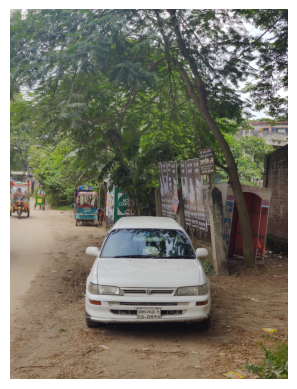

In [15]:
utils.show_image('images/image8.jpg')

Image Name: images/image8.jpg
License Plate Text: ('ঢাকা মেট্রো-গ', '১৯-০৪৭৬')


('ঢাকা মেট্রো-গ', '১৯-০৪৭৬')

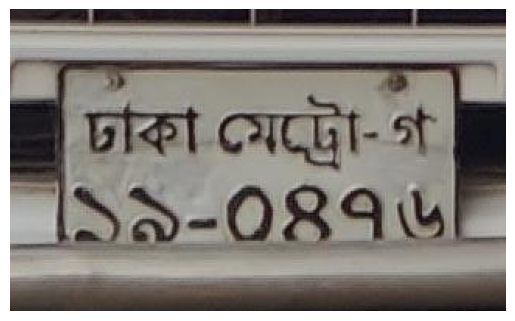

In [16]:
utils.detect_and_extract_lp_text('images/image8.jpg')

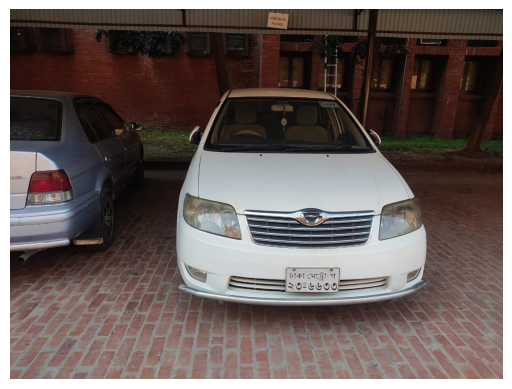

In [17]:
utils.show_image('images/image9.jpg')

Image Name: images/image9.jpg
License Plate Text: ('ঢাকা মেট্রো-হ', '২৩-৬৬৩')


('ঢাকা মেট্রো-হ', '২৩-৬৬৩')

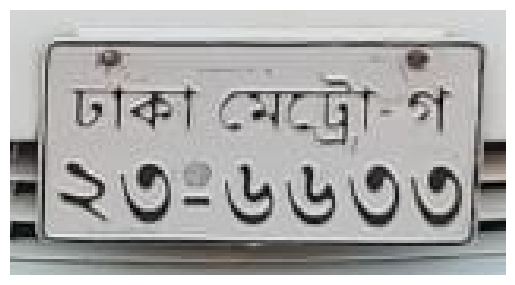

In [18]:
utils.detect_and_extract_lp_text(
    'images/image9.jpg')

In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the ground truth CSV file
ground_truth_csv_path = 'dataset.xlsx'
ground_truth_df = pd.read_excel(ground_truth_csv_path)

# Load the predictions CSV file
predictions_csv_path = 'output_results.xlsx'
predictions_df = pd.read_excel(predictions_csv_path)

# Merge ground truth and predictions on the image file name
merged_df = pd.merge(ground_truth_df, predictions_df, on='image_file_name')

# Calculate accuracy for text recognition
ground_truth_characters = merged_df['ground_truth_characters']
predicted_characters = merged_df['predicted_characters']

# Assuming 'ground_truth_characters' and 'predicted_characters' contain the actual and predicted license plate numbers

# Convert both columns to strings for accurate comparison
ground_truth_characters = ground_truth_characters.astype(str)
predicted_characters = predicted_characters.astype(str)

# Calculate accuracy using sklearn's accuracy_score function
text_recognition_accuracy = accuracy_score(
    ground_truth_characters, predicted_characters)

print(f'Text Recognition Accuracy: {text_recognition_accuracy * 100:.2f}%')

Text Recognition Accuracy: 44.44%


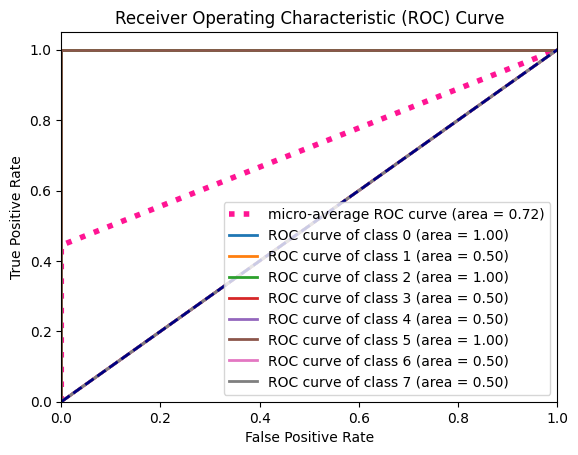

Text Recognition Accuracy: 44.44%


In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load the ground truth Excel file
ground_truth_excel_path = 'dataset.xlsx'
ground_truth_df = pd.read_excel(ground_truth_excel_path)

# Load the predictions Excel file
predictions_excel_path = 'output_results.xlsx'
predictions_df = pd.read_excel(predictions_excel_path)

# Merge ground truth and predictions on the image file name
merged_df = pd.merge(ground_truth_df, predictions_df, on='image_file_name')

# Calculate accuracy for text recognition
ground_truth_characters = merged_df['ground_truth_characters']
predicted_characters = merged_df['predicted_characters']

# Assuming 'ground_truth_characters' and 'predicted_characters' contain the actual and predicted license plate numbers

# Convert both columns to strings for accurate comparison
ground_truth_characters = ground_truth_characters.astype(str)
predicted_characters = predicted_characters.astype(str)

# Calculate accuracy using sklearn's accuracy_score function
text_recognition_accuracy = accuracy_score(ground_truth_characters, predicted_characters)

# Binarize the labels for multi-class ROC curve
ground_truth_bin = label_binarize(ground_truth_characters, classes=ground_truth_characters.unique())
predicted_bin = label_binarize(predicted_characters, classes=ground_truth_characters.unique())

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = ground_truth_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_bin[:, i], predicted_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ground_truth_bin.ravel(), predicted_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot each class's ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'Text Recognition Accuracy: {text_recognition_accuracy * 100:.2f}%')


28 28
28 28
28 28
28 27
28 26
28 28
28 27
28 28
28 27
Average Character-level Accuracy: 82.69%


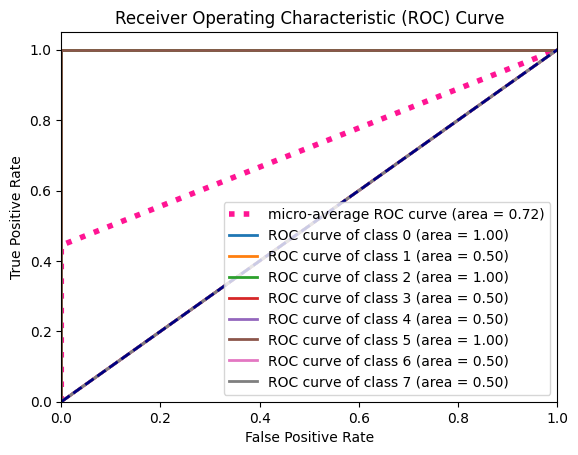

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the ground truth Excel file
ground_truth_csv_path = 'dataset.xlsx'
ground_truth_df = pd.read_excel(ground_truth_csv_path)

# Load the predictions Excel file
predictions_csv_path = 'output_results.xlsx'
predictions_df = pd.read_excel(predictions_csv_path)

# Merge ground truth and predictions on the image file name
merged_df = pd.merge(ground_truth_df, predictions_df, on='image_file_name')

# Calculate character-level accuracy for text recognition
ground_truth_characters = merged_df['ground_truth_characters'].astype(str)
predicted_characters = merged_df['predicted_characters'].astype(str)

# Initialize an empty list to store character-level accuracy for each line
char_accuracy_list = []

# # Iterate through each pair of ground truth and predicted strings
# for true_chars, pred_chars in zip(ground_truth_characters, predicted_characters):
#     # Calculate accuracy for each line
#     char_accuracy = accuracy_score(list(true_chars), list(pred_chars))
#     char_accuracy_list.append(char_accuracy)

for true_chars, pred_chars in zip(ground_truth_characters, predicted_characters):
    print(len(true_chars), len(pred_chars))  # Add this line to check lengths

    # Ensure both strings have the same length
    min_len = min(len(true_chars), len(pred_chars))
    true_chars = true_chars[:min_len]
    pred_chars = pred_chars[:min_len]

    # Calculate accuracy for each line
    char_accuracy = accuracy_score(list(true_chars), list(pred_chars))
    char_accuracy_list.append(char_accuracy)
    
# Calculate the average character-level accuracy
average_char_accuracy = sum(char_accuracy_list) / len(char_accuracy_list)

print(f'Average Character-level Accuracy: {average_char_accuracy * 100:.2f}%')




# canculate roc curve
ground_truth_bin = label_binarize(ground_truth_characters, classes=ground_truth_characters.unique())
predicted_bin = label_binarize(predicted_characters, classes=ground_truth_characters.unique())

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = ground_truth_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_bin[:, i], predicted_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ground_truth_bin.ravel(), predicted_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot each class's ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
import pandas as pd

# Load data from the first Excel file
excel_file_1 = 'dataset.xlsx'
df1 = pd.read_excel(excel_file_1)

# Load data from the second Excel file
excel_file_2 = 'output_results.xlsx'
df2 = pd.read_excel(excel_file_2)

# Assuming the columns containing the text you want to check are named 'ground_truth_characters' and 'predicted_characters'
column_to_check_1 = 'ground_truth_characters'
column_to_check_2 = 'predicted_characters'

# Initialize a list to store Jaccard similarity scores
jaccard_similarities = []

# Iterate through rows of both DataFrames
for index, row in df1.iterrows():
    # Convert the text to sets of characters
    set1 = set(str(row[column_to_check_1]))
    set2 = set(str(df2.loc[index, column_to_check_2]))

    # Calculate Jaccard similarity as a percentage
    similarity_percentage = (len(set1.intersection(
        set2)) / len(set1.union(set2))) * 100 if len(set1.union(set2)) != 0 else 0

    # Append the similarity score to the list
    jaccard_similarities.append(similarity_percentage)

# Add a new column to df1 with Jaccard similarity scores as percentages
df1['jaccard_similarity_percentage'] = jaccard_similarities

# Print the DataFrame with the Jaccard similarity scores
print(df1[['jaccard_similarity_percentage']])

# Calculate and print the mean percentage
mean_similarity_percentage = df1['jaccard_similarity_percentage'].mean()
print(f'Mean Jaccard Similarity Percentage: {mean_similarity_percentage:.2f}%')

   jaccard_similarity_percentage
0                     100.000000
1                      90.476190
2                     100.000000
3                      95.000000
4                      95.238095
5                     100.000000
6                      85.714286
7                     100.000000
8                      90.000000
Mean Jaccard Similarity Percentage: 95.16%
